In [47]:
import ROOT as _ROOT
import numpy as np 
def _RooFitResult_nameArray(self):
    return np.array([p.GetName() for p in self.floatParsFinal()])

_ROOT.RooFitResult.nameArray = _RooFitResult_nameArray


def _RooFitResult_massScales(self):
    result = []
    for p in self.floatParsFinal():
        if("massScale" in p.GetName()):
             result.append([p.GetName(),p.getVal(),p.getErrorHi(),p.getErrorLo()])
    return np.array(result,dtype=object)

_ROOT.RooFitResult.massScales = _RooFitResult_massScales

def _RooFitResult_valueArray(self):
    return np.array([p.getVal() for p in self.floatParsFinal()])

_ROOT.RooFitResult.valueArray = _RooFitResult_valueArray

def _RooFitResult_errorHiArray(self):
    return np.array([p.getErrorHi() for p in self.floatParsFinal()])

_ROOT.RooFitResult.errorHiArray = _RooFitResult_errorHiArray

def _RooFitResult_errorLoArray(self):
    return np.array([p.getErrorLo() for p in self.floatParsFinal()])

_ROOT.RooFitResult.errorLoArray = _RooFitResult_errorLoArray

def _RooFitResult_covarianceArray(self):
    param_cov = self.covarianceMatrix()
    param_cov = np.frombuffer(param_cov.GetMatrixArray(), dtype='d', count=param_cov.GetNoElements())
    param_cov = param_cov.reshape(int(np.sqrt(param_cov.size)), -1)
    return param_cov

_ROOT.RooFitResult.covarianceArray = _RooFitResult_covarianceArray


In [48]:
from ROOT import TFile
#f = TFile("TTbarSelection/fitDiagnostics.root")
f = TFile("TTbarSelectionOneScale/fitDiagnostics.root")
f = TFile("TTbarSelectionOneScalePtDependentMassScaleAndEffSF/fitDiagnostics.root")

In [49]:
_ROOT.__version__


'6.22/06'

In [50]:
fr=f.Get("fit_s")

In [51]:
fr.massScales()

array([['massScale_pt0_eta0_all_PT200', -0.6918199674117815,
        0.09833272246718228, -0.09696822025258546],
       ['massScale_pt0_eta0_all_PT300', -0.5249504346179719,
        0.11783847109674661, -0.11783847109674661],
       ['massScale_pt0_eta0_all_PT400', -0.8789349287941959,
        0.09738057762232022, -0.09738057762232022],
       ['massScale_pt0_eta0_all_PT500', 0.3454094754067363,
        0.2045463928916167, -0.2045463928916167],
       ['massScale_pt0_eta0_all_PT550', -0.3998990789936183,
        0.14343578820351222, -0.14343578820351222],
       ['massScale_pt0_eta0_all_PT600', -0.47743465456459777,
        0.19644488662655357, -0.19644488662655357]], dtype=object)

In [53]:
for i in fr.massScales():
    print(i[0])

massScale_pt0_eta0_all_PT200
massScale_pt0_eta0_all_PT300
massScale_pt0_eta0_all_PT400
massScale_pt0_eta0_all_PT500
massScale_pt0_eta0_all_PT550
massScale_pt0_eta0_all_PT600


In [22]:
massScale_index = ['massScale' in n for n in fr.nameArray()].index(True)

In [6]:
fr.covarianceArray().dot(fr.valueArray())

array([-0.04623197,  0.72618808, -0.2690025 , -0.72127394, -0.0070344 ,
        0.00809804,  0.02327423,  0.01599304,  0.00628731,  0.03392436,
        0.00647083,  0.07905867,  0.01129351,  0.20123186,  0.01574236,
        0.14367743,  0.01474247,  0.21486577,  0.01646251,  0.00564576,
       -0.00362963,  0.01846299,  0.00203087, -0.03744433])

In [7]:
np.sqrt(sum(fr.covarianceArray()[3]**2))

0.44888475127960636

In [86]:
fr.errorHiArray()

array([0.94747519, 0.7700247 , 0.8691047 , 0.60898582, 0.11869889,
       0.11398305, 0.12494954, 0.12638416, 0.13789886, 0.12741952,
       0.14525593, 0.14190681, 0.13205674, 0.1200927 , 0.12043441,
       0.11902268, 0.11964322, 0.11137575, 0.10851419, 0.11646469,
       0.11902307, 0.12009399, 0.1193588 , 0.17243937, 0.11866159,
       0.13229311, 0.12741452, 0.11870057, 0.11240433, 0.11180797,
       0.1122346 , 0.11346492, 0.10866811, 0.10606188, 0.10988829,
       0.11656142, 0.11616473, 0.11358724, 0.1152468 , 0.11197047,
       0.1210926 , 0.1173352 , 0.11059378, 0.10725678, 0.10705718,
       0.1071274 , 0.10990274, 0.10446761, 0.10327589, 0.10523915,
       0.11197377, 0.10986618, 0.10810953, 0.11152802, 0.10767898,
       0.10983513, 0.10703386, 0.10424803, 0.10334758, 0.10343494,
       0.10390054, 0.10444341, 0.10276575, 0.10176401, 0.10344634,
       0.1061618 , 0.10673824, 0.1062192 , 0.10500606, 0.10451396,
       0.10437193, 0.10283233, 0.10210612, 0.10243425, 0.10239

In [79]:
e_m=np.zeros(len(fr.nameArray()))

In [80]:
e_m[massScale_index] = 1

In [81]:
np.sqrt(e_m.T.dot(fr.covarianceArray().dot(e_m)))

0.6114800130211941

In [87]:
fr.errorHiArray()[massScale_index]

0.6089858154541963

In [8]:
massScale_index

18

In [78]:
import glob
massScales = {s.split('/')[0]:np.load(s) for s in glob.glob('TTbar*InclPtData/*.npy')}
print(massScales)
fit_regions = {
    'TTbarTopOnlyInclPtData':'JMS SF top-jet (passing tau32<0.5):\t\t\t\t\t\t',
    'TTbarWOnlyInclPtData':'JMS SF W-jet (passing tau21<0.45):\t\t\t\t\t\t',
    'TTbarInclPtData':'JMS SF W-jet (passing tau21<0.45) and top-jet (passing tau32<0.5) combined fit:\t'}
for fitname,scale in massScales.items():
    print(fit_regions[fitname], "%.3f +- %.4f %%"%((100+scale[0][0])/100,scale[0][1]/100) )

{'TTbarTopOnlyInclPtData': array([[ 0.54378647,  0.13935191, -0.14749643]]), 'TTbarWOnlyInclPtData': array([[ 1.21267627,  0.19709415, -0.20439349]]), 'TTbarInclPtData': array([[ 0.73905291,  0.11884524, -0.11703056]])}
JMS SF top-jet (passing tau32<0.5):						 1.005 +- 0.0014 %
JMS SF W-jet (passing tau21<0.45):						 1.012 +- 0.0020 %
JMS SF W-jet (passing tau21<0.45) and top-jet (passing tau32<0.5) combined fit:	 1.007 +- 0.0012 %


In [28]:
import glob,ROOT
import numpy as np
def load_gofs(file_pattern):
    limitErr,limit,observed = ([],[],[])
    for ipt in range(0,7):
        for irho in range(0,7):
            gof_filenames = glob.glob(file_pattern%(ipt,irho,ipt,irho))
            gof_files = [ROOT.TFile(f) for f in gof_filenames]
            limit_trees = [f.Get("limit") for f in gof_files]
            limitErr.append(np.array([[l.limitErr for l in tree] for tree in limit_trees]))
            limit.append(np.array([[l.limit for l in tree] for tree in limit_trees]))
            observed_filename =gof_filenames[0].replace("higgsCombine.","higgsCombineBaseline.")
            observed_file = ROOT.TFile(observed_filename)
            observed_tree = [l.limit for l in observed_file.Get("limit")]
            observed.append(observed_tree[0])
            #print(limit[-1].shape,ipt,irho)
    #print(limitErr)
    #limitErr = np.array(limitErr).reshape((6,6,10,50))
    limit = np.array(limit).reshape((7,7,10,50))
    observed = np.array(observed).reshape((7,7))
    #if(any(limitErr.flatten()<0)):
    #    print("failed fits in ",ipt,"x",irho)
    return limit,observed

In [29]:
DataTF = load_gofs("/afs/desy.de/user/a/albrechs/xxl/af-cms/UHH2/10_2_17/CMSSW_10_2_17/src/UHH2/JetMass/rhalph/DUST/FTest_DataTFScan_saturated_Seed*/VJetsSelectionTFPt%iRho%i/VJetsSelectionTFPt%iRho%i/higgsCombine.GoodnessOfFit.mH0.*.root")
Data2TF = load_gofs("/nfs/dust/cms/user/albrechs/JetMassCalibration/FTest_DataTFScan_QCDOrder3x1_saturated_Seed*/VJetsSelectionMCTFPt3Rho1DataResTFPt%iRho%i/VJetsSelectionMCTFPt3Rho1DataResTFPt%iRho%i//higgsCombine.GoodnessOfFit.mH0.*.root")
QCDTF = load_gofs('/nfs/dust/cms/user/albrechs/JetMassCalibration/FTest_QCDTFScan_saturated_Seed*/VJetsSelectionMCTFPt%iRho%iDataResTFPt0Rho0/VJetsSelectionMCTFPt%iRho%iDataResTFPt0Rho0/qcdmodel/higgsCombine.GoodnessOfFit.mH0.*.root')
#QCDTF = load_gofs('/nfs/dust/cms/user/albrechs/JetMassCalibration/FTestOldScaleNRangeFixedR/FTest_QCDTFScan_saturated_Seed*/VJetsSelectionMCTFPt%iRho%iDataResTFPt0Rho0/VJetsSelectionMCTFPt%iRho%iDataResTFPt0Rho0/qcdmodel/higgsCombine.GoodnessOfFit.mH0.*.root')


In [30]:
DataTF[1]

array([[686.59994878, 349.63430794, 262.63978648, 170.84330696,
        164.15949801, 123.34893149, 119.7630931 ],
       [673.71461348, 303.42788106, 213.46823795, 154.52936573,
        147.22643158,  96.70231299,  96.20412914],
       [671.37222375, 281.69330284, 180.79150145, 130.24343248,
        107.19458047,  59.58222055,  54.48234715],
       [670.93636791, 277.84947349, 180.15043359, 125.7976408 ,
         92.20289949,  53.48235154,  47.68777165],
       [670.86742485, 276.62271342, 177.27346   , 123.28128232,
         85.49941497,  46.37724711,  41.68431038],
       [670.86742494, 276.62271556, 177.27346276, 123.28128092,
         85.49167348,  45.80453371,  41.62906152],
       [670.86742486, 276.62271634, 177.27346025, 123.2812824 ,
         85.4916807 ,  45.80451611,  41.59992419]])

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


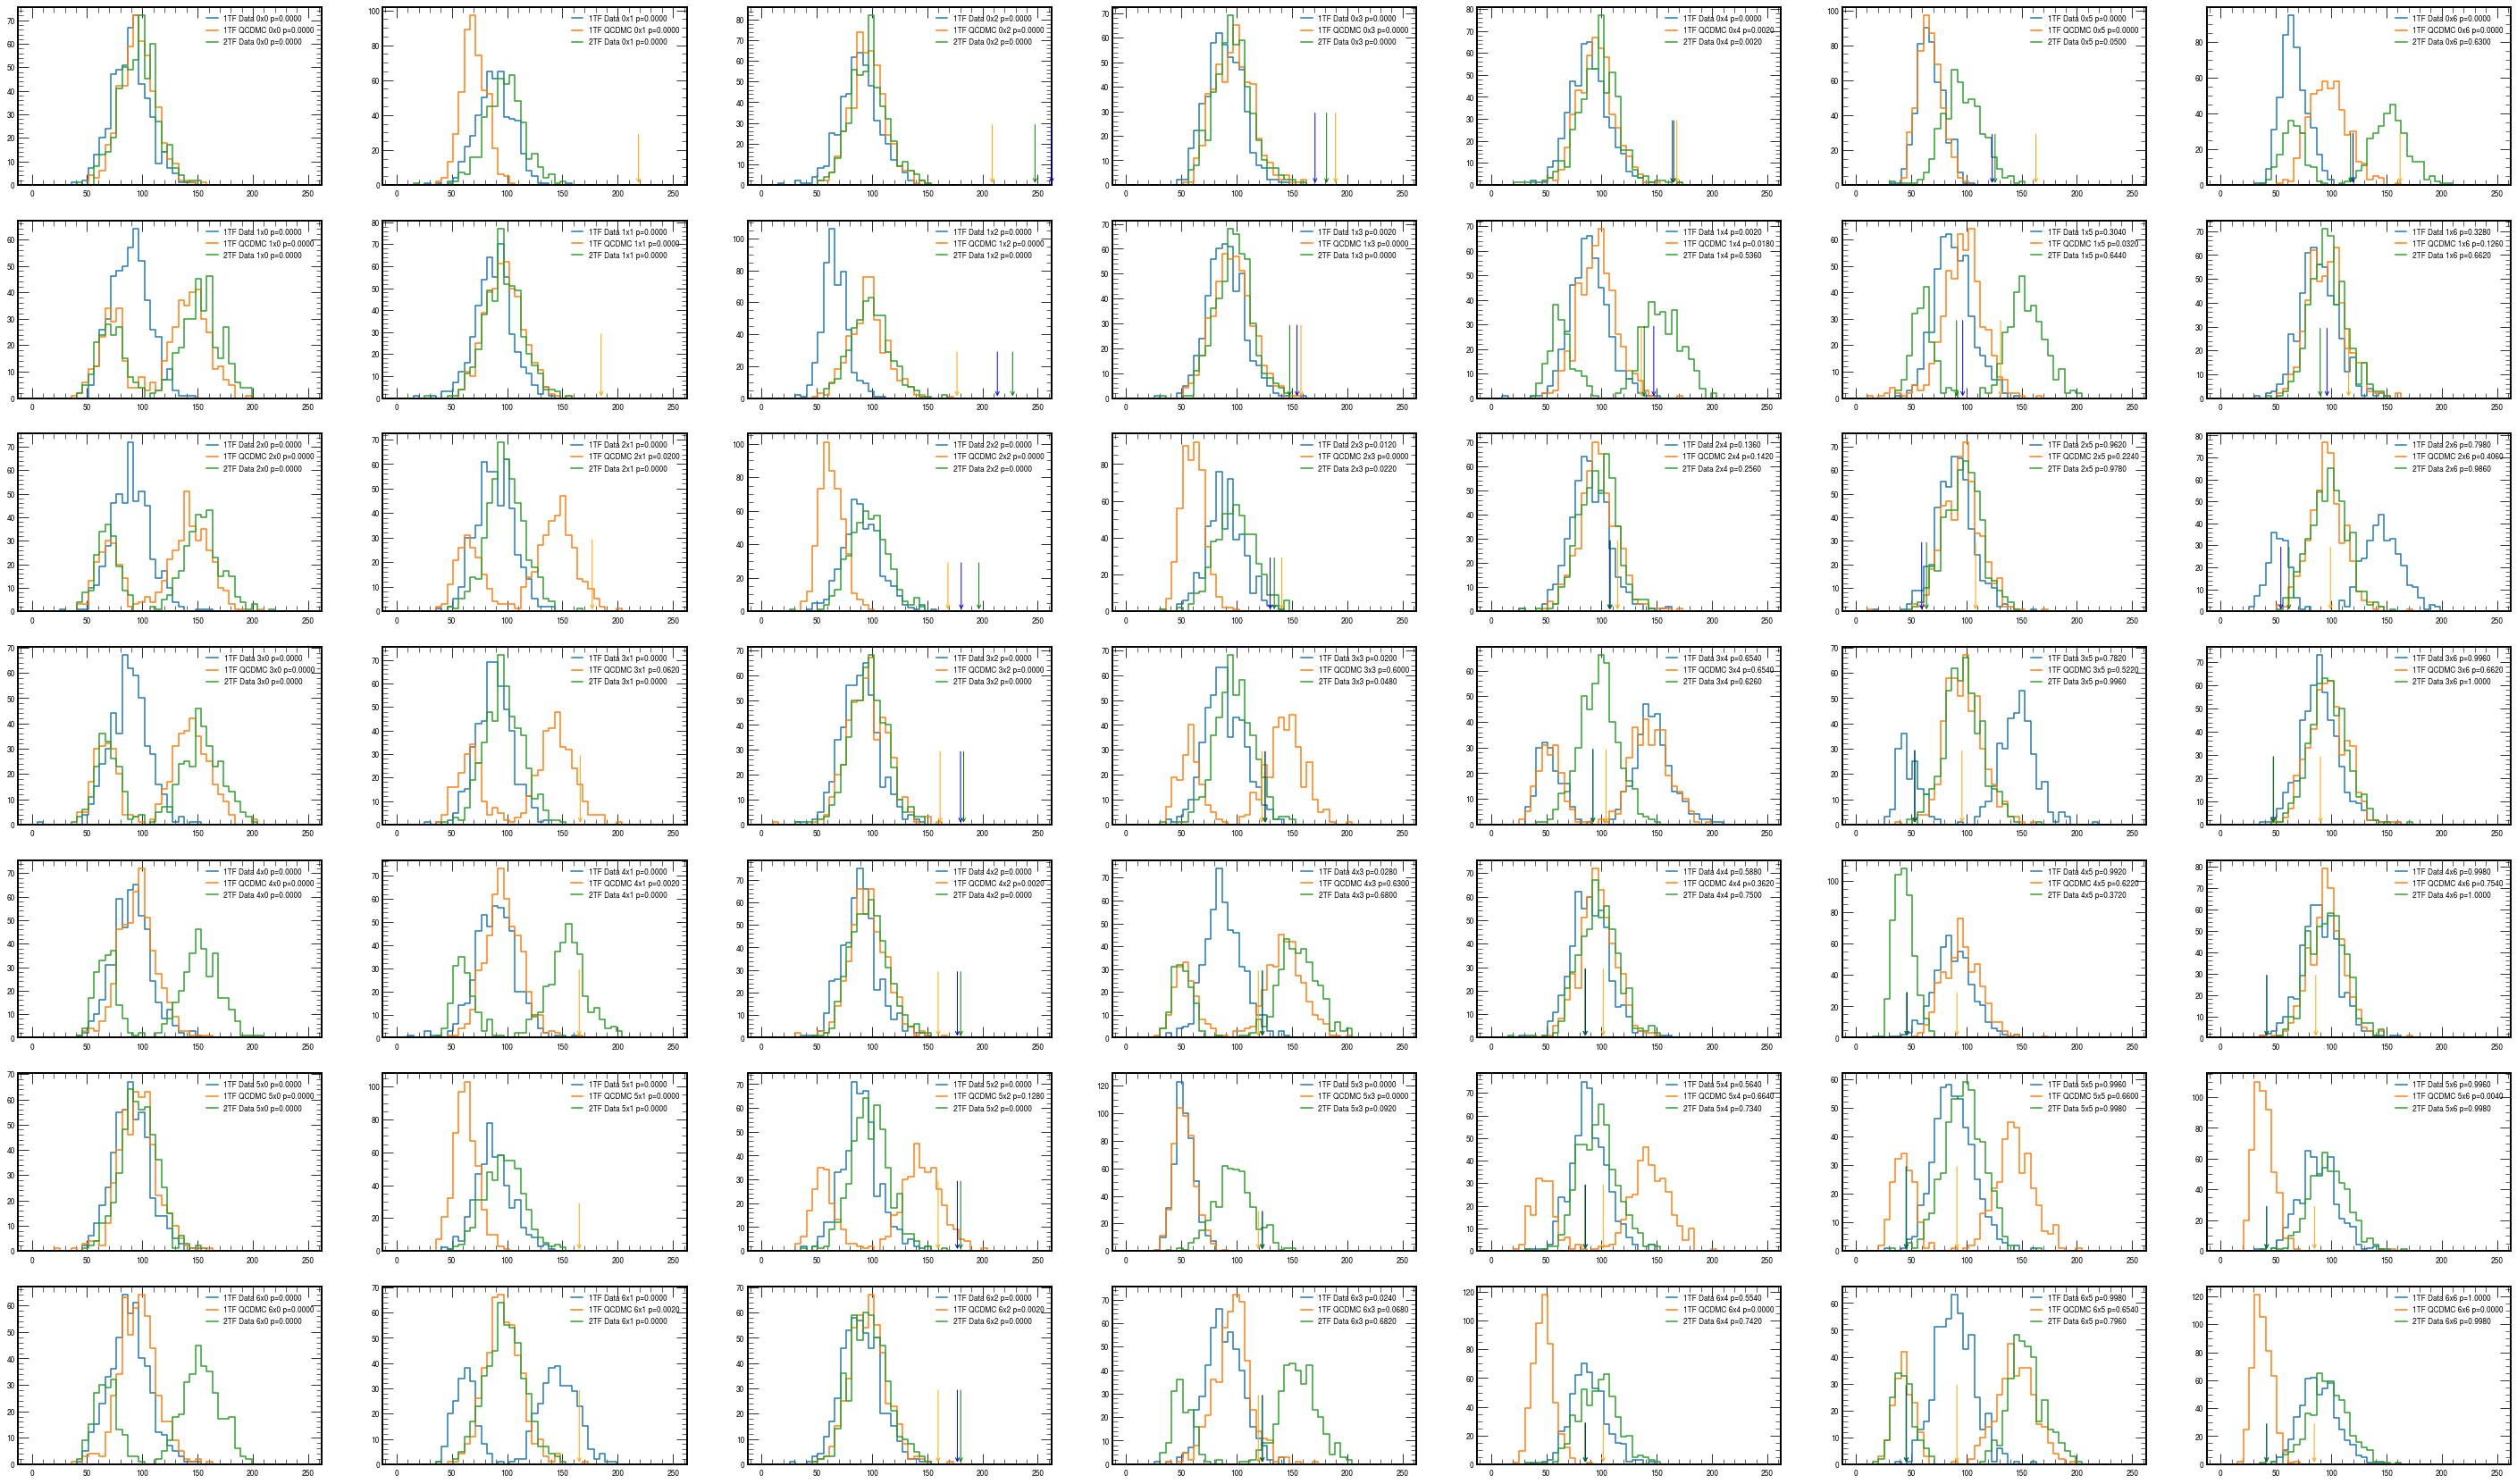

In [43]:

import mplhep as hep
import matplotlib.pyplot as plt
plt.style.use(hep.style.CMS)
%matplotlib inline

f,ax = plt.subplots(7,7,figsize=(50,30))
for ipt in range(0,7):
    for irho in range(0,7):
        bins = np.linspace(0,250,50)

        limit= DataTF[0][ipt][irho].flatten()
        obs= DataTF[1][ipt][irho]
        hep.histplot(np.histogram(limit.flatten(),bins),ax=ax[ipt][irho],label='1TF Data %ix%i p=%.4f'%(ipt,irho,1.-(float(sum(obs > limit))/float(len(limit))) ) )
        ax[ipt][irho].annotate("", xy=(obs, 0.0), xytext=(obs, 30),arrowprops=dict(arrowstyle="->",color='blue'))

        limitQCD= QCDTF[0][ipt][irho].flatten()        
        obsQCD= QCDTF[1][ipt][irho]
        hep.histplot(np.histogram(limitQCD.flatten(),bins),ax=ax[ipt][irho],label='1TF QCDMC %ix%i p=%.4f'%(ipt,irho,1.-(float(sum(obsQCD > limitQCD))/float(len(limitQCD))) ) )
        ax[ipt][irho].annotate("", xy=(obsQCD, 0.0), xytext=(obsQCD, 30),arrowprops=dict(arrowstyle="->",color='orange'))

        limit2TF= Data2TF[0][ipt][irho].flatten()
        obs2TF= Data2TF[1][ipt][irho]
        hep.histplot(np.histogram(limit2TF.flatten(),bins),ax=ax[ipt][irho],label='2TF Data %ix%i p=%.4f'%(ipt,irho,1.-(float(sum(obs2TF > limit2TF))/float(len(limit2TF))) ) )
        ax[ipt][irho].annotate("", xy=(obs2TF, 0.0), xytext=(obs2TF, 30),arrowprops=dict(arrowstyle="->",color='green'))
        
        if(ipt>=3 and irho>=1 and False):
            limit2TFred= Data2TF[0][ipt-3][irho-1].flatten()
            obs2TFred= Data2TF[1][ipt-3][irho-1]
            hep.histplot(np.histogram(limit2TFred.flatten(),bins),ax=ax[ipt][irho],label='2TF Data %ix%i p=%.4f'%(ipt-3,irho-1,1.-(float(sum(obs2TFred > limit2TFred))/float(len(limit2TFred))) ) )
            ax[ipt][irho].annotate("", xy=(obs2TFred, 0.0), xytext=(obs2TFred, 30),arrowprops=dict(arrowstyle="->",color='red'))
        ax[ipt][irho].legend()
f.savefig("FTests.pdf", bbox_inches='tight')

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


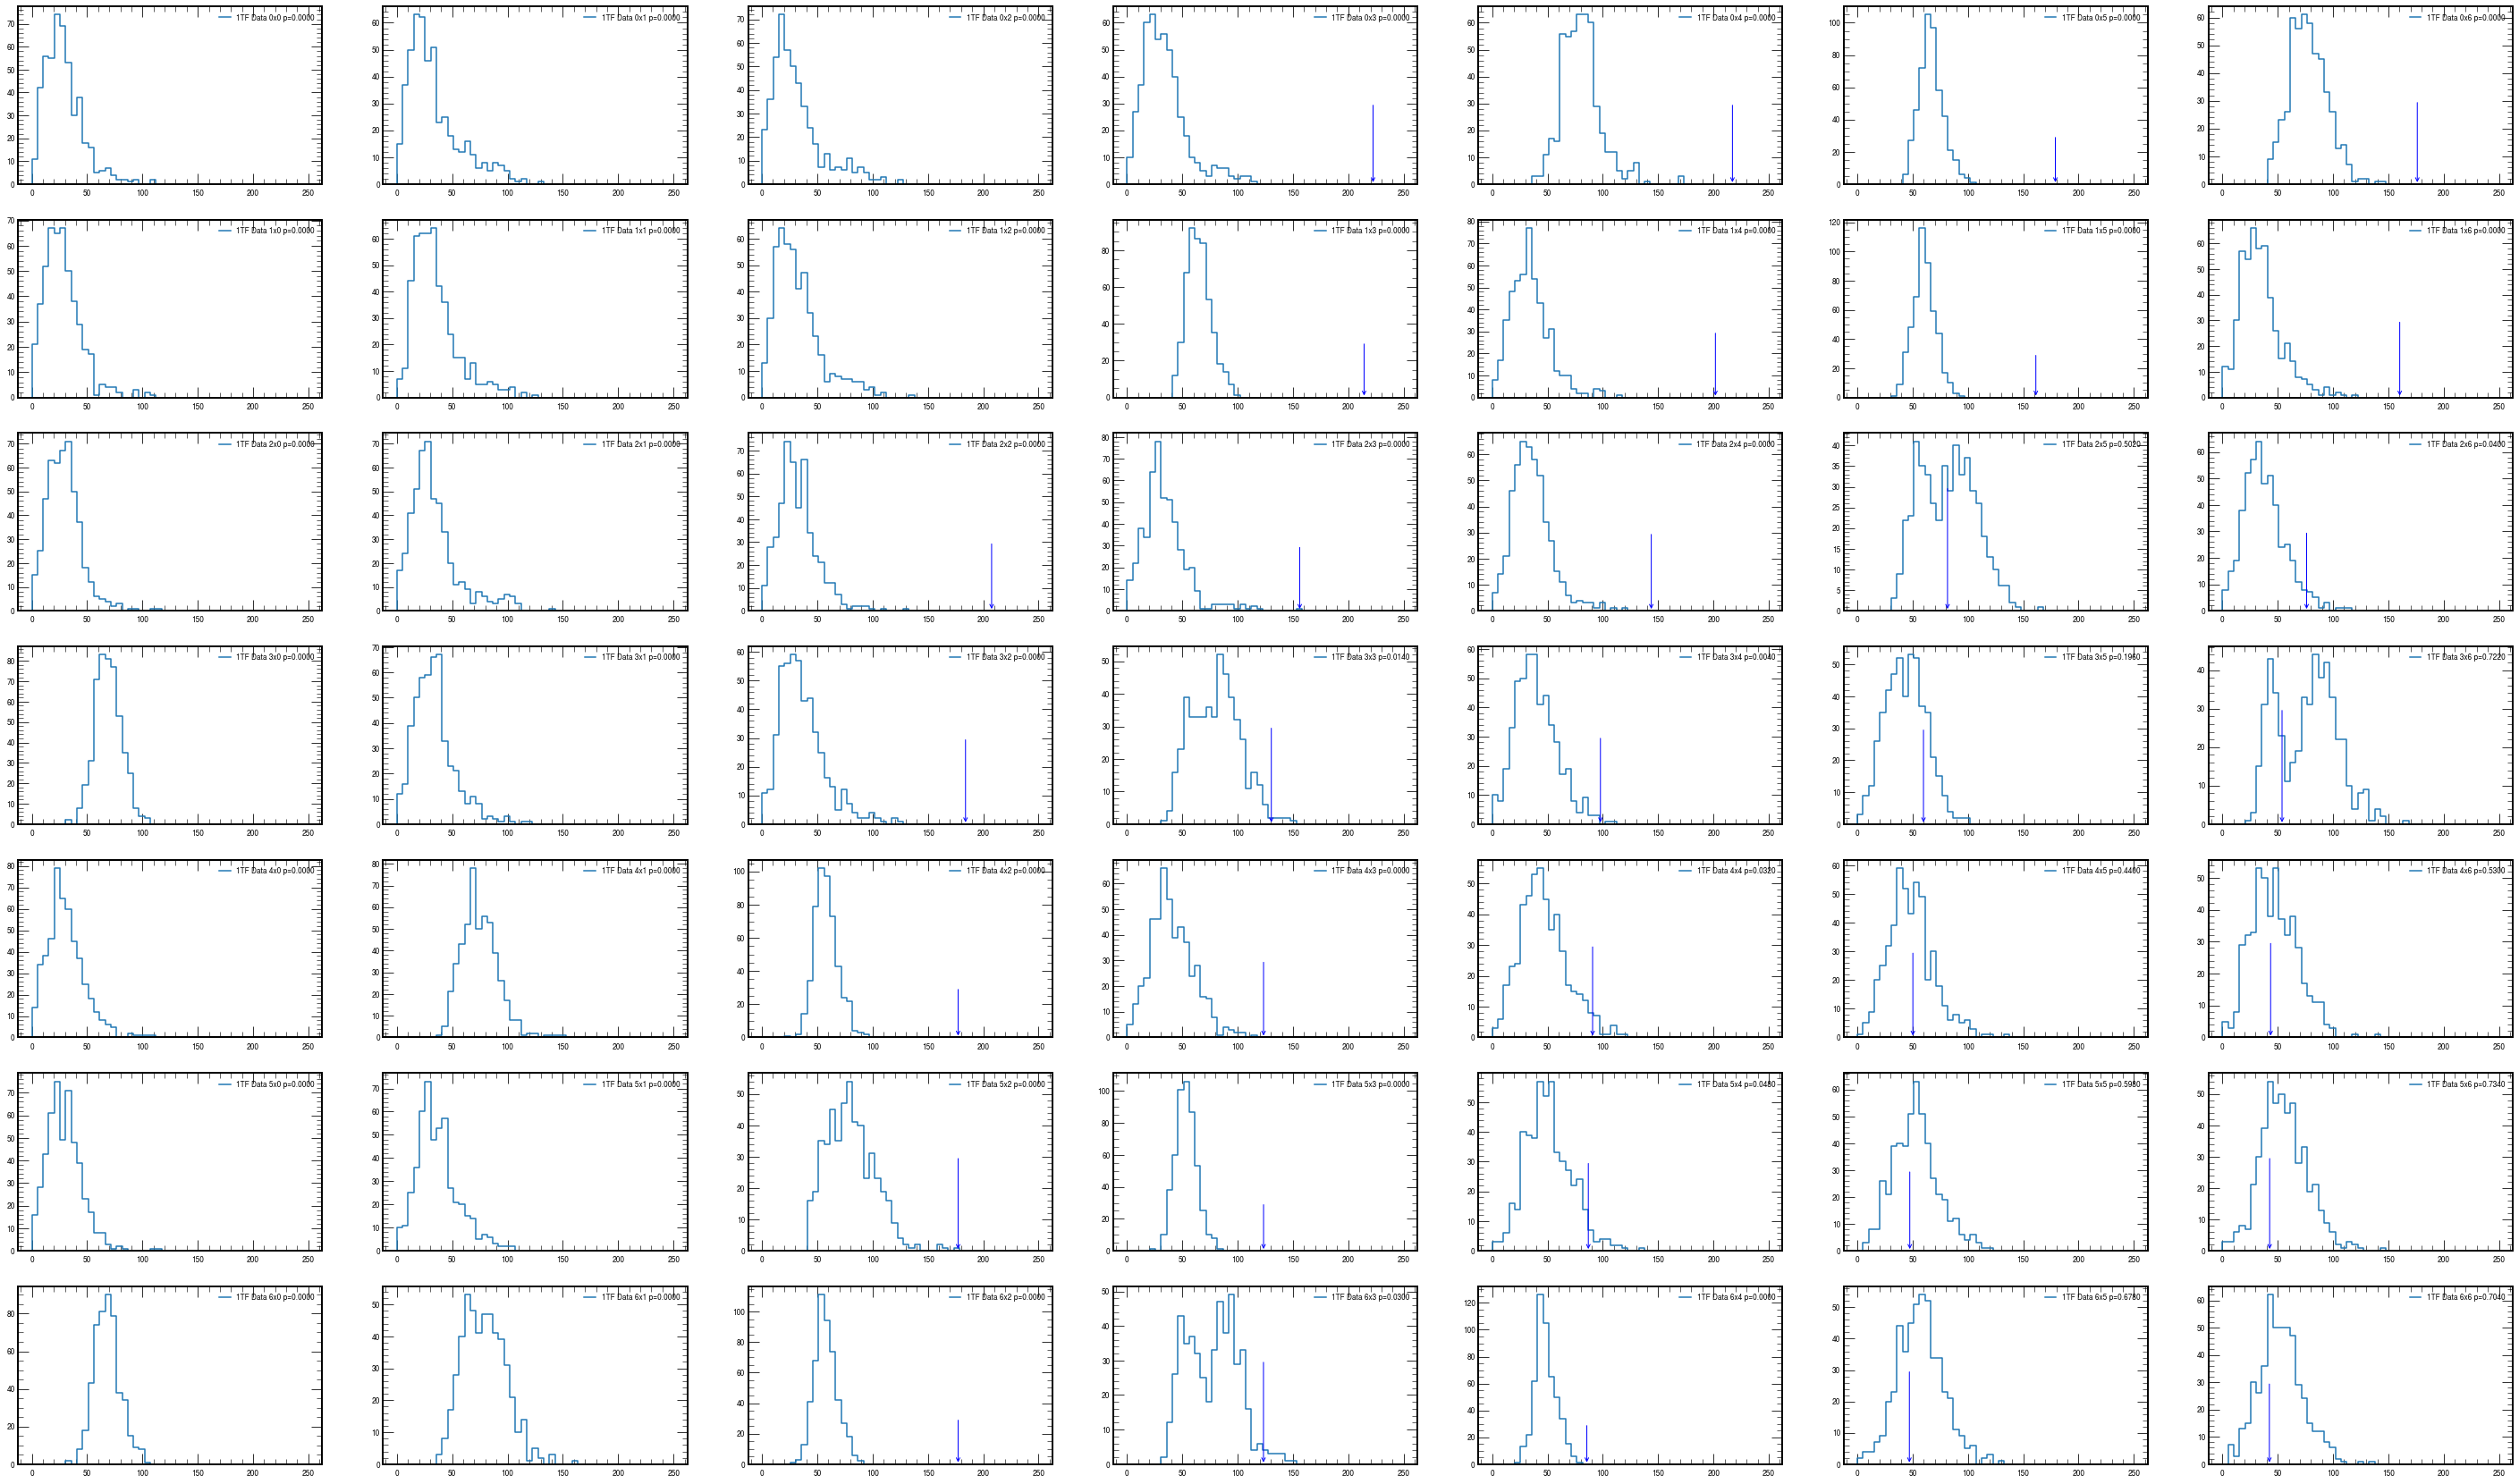

In [45]:
DataTF = load_gofs("/nfs/dust/cms/user/albrechs/JetMassCalibration/FTestOldScaleNRangeFixedR/FTest_DataTFScan_saturated_Seed*/VJetsSelectionTFPt%iRho%i/VJetsSelectionTFPt%iRho%i/higgsCombine.GoodnessOfFit.mH0.*.root")
#Data2TF = load_gofs("/nfs/dust/cms/user/albrechs/JetMassCalibration/FTestOldScaleNRangeFixedR/FTest_DataTFScan_QCDOrder3x1_saturated_Seed*/VJetsSelectionMCTFPt3Rho1DataResTFPt%iRho%i/VJetsSelectionMCTFPt3Rho1DataResTFPt%iRho%i//higgsCombine.GoodnessOfFit.mH0.*.root")
#QCDTF = load_gofs('/nfs/dust/cms/user/albrechs/JetMassCalibration/FTest_QCDTFScan_saturated_Seed*/VJetsSelectionMCTFPt%iRho%iDataResTFPt0Rho0/VJetsSelectionMCTFPt%iRho%iDataResTFPt0Rho0/qcdmodel/higgsCombine.GoodnessOfFit.mH0.*.root')
#QCDTF = load_gofs('FTest_QCDTFScan_saturated_Seed*/VJetsSelectionMCTFPt%iRho%iDataResTFPt0Rho0/VJetsSelectionMCTFPt%iRho%iDataResTFPt0Rho0/qcdmodel/higgsCombine.GoodnessOfFit.mH0.*.root')
f,ax = plt.subplots(7,7,figsize=(50,30))
for ipt in range(0,7):
    for irho in range(0,7):
        bins = np.linspace(0,250,50)

        limit= DataTF[0][ipt][irho].flatten()
        obs= DataTF[1][ipt][irho]
        hep.histplot(np.histogram(limit.flatten(),bins),ax=ax[ipt][irho],label='1TF Data %ix%i p=%.4f'%(ipt,irho,1.-(float(sum(obs > limit))/float(len(limit))) ) )
        ax[ipt][irho].annotate("", xy=(obs, 0.0), xytext=(obs, 30),arrowprops=dict(arrowstyle="->",color='blue'))

        #limitQCD= QCDTF[0][ipt][irho].flatten()        
        #obsQCD= QCDTF[1][ipt][irho]
        #hep.histplot(np.histogram(limitQCD.flatten(),bins),ax=ax[ipt][irho],label='1TF QCDMC %ix%i p=%.4f'%(ipt,irho,1.-(float(sum(obsQCD > limitQCD))/float(len(limitQCD))) ) )
        #ax[ipt][irho].annotate("", xy=(obsQCD, 0.0), xytext=(obsQCD, 30),arrowprops=dict(arrowstyle="->",color='orange'))

        #limit2TF= Data2TF[0][ipt][irho].flatten()
        #obs2TF= Data2TF[1][ipt][irho]
        #hep.histplot(np.histogram(limit2TF.flatten(),bins),ax=ax[ipt][irho],label='2TF Data %ix%i p=%.4f'%(ipt,irho,1.-(float(sum(obs2TF > limit2TF))/float(len(limit2TF))) ) )
        #ax[ipt][irho].annotate("", xy=(obs2TF, 0.0), xytext=(obs2TF, 30),arrowprops=dict(arrowstyle="->",color='green'))
        
        #if(ipt>=3 and irho>=1 and False):
        #    limit2TFred= Data2TF[0][ipt-3][irho-1].flatten()
        #    obs2TFred= Data2TF[1][ipt-3][irho-1]
        #   hep.histplot(np.histogram(limit2TFred.flatten(),bins),ax=ax[ipt][irho],label='2TF Data %ix%i p=%.4f'%(ipt-3,irho-1,1.-(float(sum(obs2TFred > limit2TFred))/float(len(limit2TFred))) ) )
        #   ax[ipt][irho].annotate("", xy=(obs2TFred, 0.0), xytext=(obs2TFred, 30),arrowprops=dict(arrowstyle="->",color='red'))
        ax[ipt][irho].legend()
f.savefig("FTestsBoundQCDParams.pdf", bbox_inches='tight')

# AnalysisTree Acrobatics

## ROOT

In [1]:
import ROOT

Welcome to JupyROOT 6.22/08


In [2]:
f = ROOT.TChain("AnalysisTree")

In [3]:
f.Add("/nfs/dust/cms/user/albrechs/UHH2/JetMassOutput/TTBarTrees/workdir_Top_PreSel_0p005Variation/*TTbar_had*.root")

288

In [10]:
nevents_max = 100
hist = ROOT.TH1F('msd','m_{SD}',40,0,200)
ievent = 0
while ievent<nevents_max:
    f.GetEntry(ievent)
    #csv_.add_row(...)
    #hist.Fill(f.mjet,f.weight)
    #print(f.mjet,f.weight)
    ievent +=1
hist.Print()
c=ROOT.TCanvas()
hist.Draw()
c.SaveAs('massHist.pdf')

86.43051685594632 0.02625989631750464
23.846841742591824 0.019291010193795526
0.8626884399643091 0.36770772530576296
160.07298947565343 0.05220934475067869
4.882957531672034 0.28795060725195926
4.567748864912303 0.4777972251186048
81.18754315680691 0.0020648324362159466
8.996676725525862 0.0091393342788714
78.10848696713816 0.36055159475332355
0.6104170831798323 0.02625989631750464
21.145648342644222 0.2990359952776565
76.94129185489956 0.4820443496725394
83.32915827014399 0.39377674677653063
3.0955183435775084 0.34587904817617
-0.0861457916972206 0.4632428350286178
2.5065947315558916 0.42065656975934596
75.53507661259269 0.39377674677653063
64.5296507702231 0.480393118318624
4.193053542492625 0.39377674677653063
37.587465640621154 0.30085611495198145
48.82087743195822 0.4511185051068435
114.42584728369015 0.48220840061112874
48.87832587870527 0.4150829418962407
109.89927160288042 0.28795060725195926
119.16782189912506 0.3165316605273175
124.40569296198623 0.48273886543756195
7.3504270

Warning in <TROOT::Append>: Replacing existing TH1: msd (Potential memory leak).
Info in <TCanvas::Print>: pdf file massHist.pdf has been created


## uproot

In [12]:
import uproot,glob

In [13]:

f_ = [uproot.open(f_i) for f_i in glob.glob("/nfs/dust/cms/user/albrechs/UHH2/JetMassOutput/TTBarTrees/workdir_Top_PreSel_0p005Variation/*TTbar_had*.root")]

In [14]:
trees = [f_i["AnalysisTree"] for f_i in f_]

In [15]:
trees[1]['mjet'].arrays(library='np')

{'mjet': array([ 73.88741059, 117.46106069, 179.13070202, 133.32505447])}